In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/clean_openlibrary_books.csv")

# Combine text fields for clustering
df["text"] = (
    df["title"].fillna("") + " " +
    df["main_author"].fillna("") + " " +
    df["subjects"].fillna("")
)
df.head()


,work_key,title,authors,subjects,first_publish_year,cover_url,main_author,clean_subjects,text
0,/works/OL66554W,Pride and Prejudice,Jane Austen,"Fiction, Romance, Historical, Regency, British...",1813,https://covers.openlibrary.org/b/id/14348537-L...,Jane Austen,"fiction, romance, historical","Pride and Prejudice Jane Austen Fiction, Roman..."
1,/works/OL138052W,Alice's Adventures in Wonderland,Lewis Carroll,"Alice (fictitious character : carroll), fictio...",1865,https://covers.openlibrary.org/b/id/10527843-L...,Lewis Carroll,"alice (fictitious character : carroll), fictio...",Alice's Adventures in Wonderland Lewis Carroll...
2,/works/OL8193416W,The Picture of Dorian Gray,Oscar Wilde,British and irish fiction (fictional works by ...,1890,https://covers.openlibrary.org/b/id/14314858-L...,Oscar Wilde,british and irish fiction (fictional works by ...,The Picture of Dorian Gray Oscar Wilde British...
3,/works/OL21177W,Wuthering Heights,Emily Brontë,British and irish fiction (fictional works by ...,1846,https://covers.openlibrary.org/b/id/12818862-L...,Emily Brontë,british and irish fiction (fictional works by ...,Wuthering Heights Emily Brontë British and ir...
4,/works/OL8193497W,A Christmas Carol,Charles Dickens,"Ghost stories, Readers, Ebenzer Scrooge (Ficti...",1843,https://covers.openlibrary.org/b/id/13299222-L...,Charles Dickens,"ghost stories, readers, ebenzer scrooge (ficti...",A Christmas Carol Charles Dickens Ghost storie...


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into vectors
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["text"])

In [3]:
from sklearn.cluster import KMeans

# Choose number of clusters (try k=5 first)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(X)

# Show sample books per cluster
for i in range(5):
    print(f"\nCluster {i}:")
    print(df[df["kmeans_cluster"] == i]["title"].head(5).tolist())



Cluster 0:
['A Christmas Carol', 'Don Quijote de la Mancha', 'The Art of War', 'The Prince', 'The Call of the Wild']

Cluster 1:
['Emma', "Gulliver's Travels", 'Northanger Abbey', 'Captains Courageous', 'Anna Karenina']

Cluster 2:
['A Study in Scarlet', 'The Hound of the Baskervilles', 'The Man Who Was Thursday', 'The Mysterious Affair at Styles', 'The Sign of Four']

Cluster 3:
['Dracula', 'Carmilla', "Baum's American Fairy Tales", 'Coraline', 'Wizard and Glass']

Cluster 4:
['Pride and Prejudice', "Alice's Adventures in Wonderland", 'The Picture of Dorian Gray', 'Wuthering Heights', 'Adventures of Huckleberry Finn']


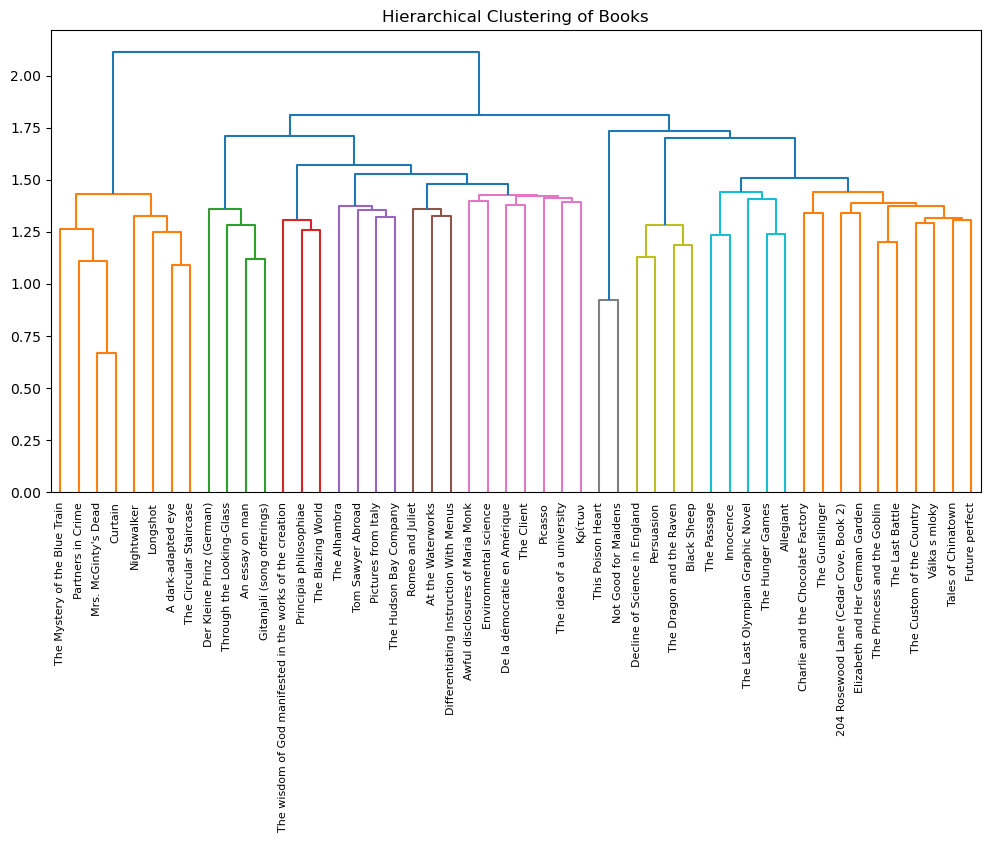

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use a smaller sample for dendrogram (e.g., 50 books) to keep it readable
sample_idx = df.sample(50, random_state=42).index
X_sample = X[sample_idx].toarray()

# Perform hierarchical clustering
Z = linkage(X_sample, method="ward")

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.loc[sample_idx, "title"].tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering of Books")
plt.show()
